In [5]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from PIL import Image

plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'Yu Gothic', 'IPAexGothic', 'Noto Sans CJK JP']
plt.rcParams['axes.unicode_minus'] = False

In [6]:
#データを整理
df23_24 = pd.read_csv('/Users/nakamurawataru/Documents/学校/研究室/SDSC/03.バスケ/6月送付分/【2025年度】プレイバイプレイ_23-24シーズン.csv')
df24_25 = pd.read_csv('/Users/nakamurawataru/Documents/学校/研究室/SDSC/03.バスケ/6月送付分/【2025年度】プレイバイプレイ_24-25シーズン.csv')
df_box = pd.read_csv('/Users/nakamurawataru/Documents/学校/研究室/SDSC/03.バスケ/6月送付分/【2025年度】ボックススコア.csv')
df_game = pd.read_csv('/Users/nakamurawataru/Documents/学校/研究室/SDSC/03.バスケ/6月送付分/【2025年度】試合データ.csv')

df_pbp = pd.concat([df23_24, df24_25], ignore_index=True)

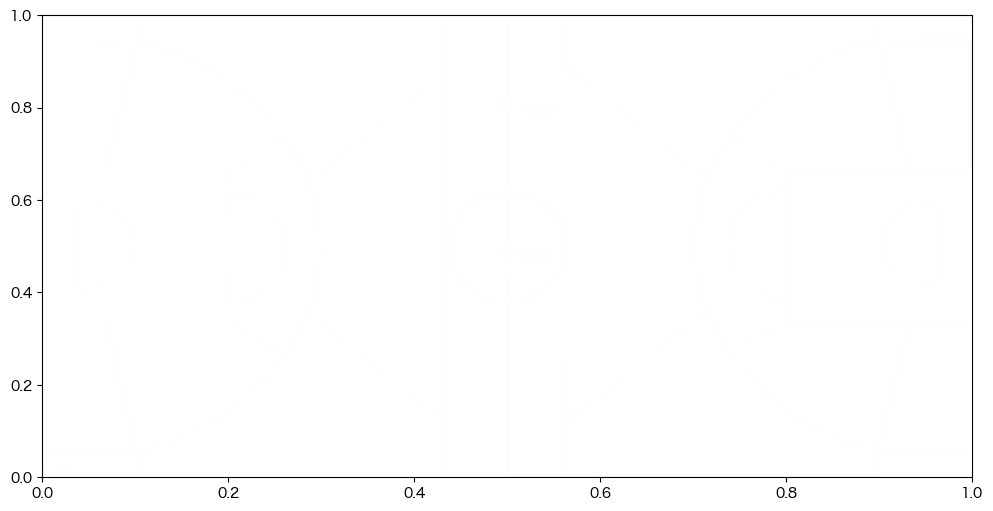

In [ ]:
im = Image.open("/Users/nakamurawataru/Documents/学校/研究室/SDSC/analysis/basketball_coords.png")

df_faul = df_pbp[df_pbp['アクション1'].isin([20,21,22,23,24,25,26,46,132,138])]
df_faul_alphas = df_faul[df_faul['チームID']==745]

fig = plt.figure(figsize=(12, 6))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(1, 1, 1)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.imshow(im, extent=[*xlim, *ylim], aspect='auto', alpha=0.01)
plt.scatter(df_faul['x座標'], df_faul['y座標'], s=0.5)
plt.show()

In [29]:
# 型と上位値を確認
col = 'アクション1'

# 方法A: 数値に変換して比較（非数値は NaN に）
num = pd.to_numeric(df_pbp[col], errors='coerce')
targets = [46]
mask = num.isin(targets)
print("該当件数:", mask.sum())
display(df_pbp.loc[mask].head())

該当件数: 0


,試合ID,履歴No,ピリオド,ピリオド残時間,チームID,チーム名,背番号1,背番号2,選手名1,選手名2,...,アクション1,アクション2,アクション3,ホームアウェイ,エリア,x座標,y座標,サイド,Unnamed: 24,Unnamed: 25


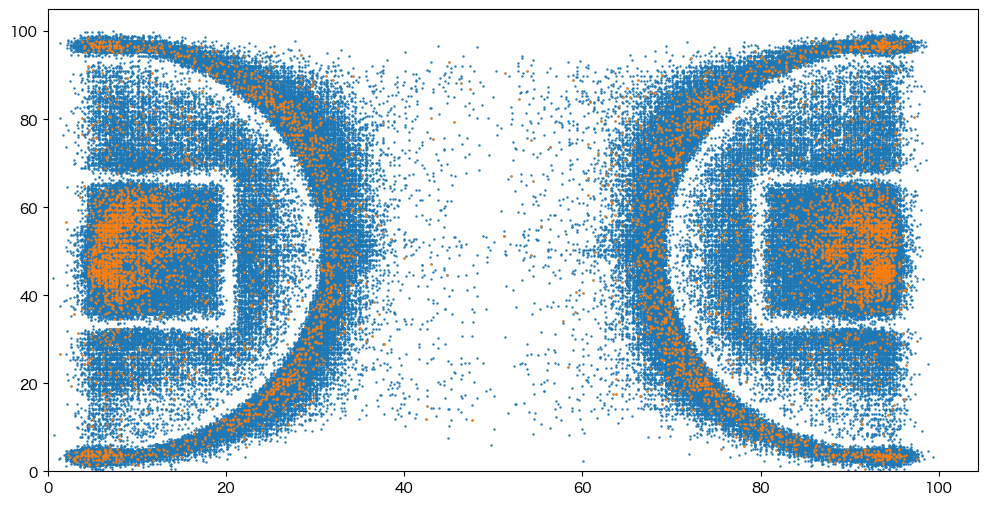

In [32]:
im = Image.open("/Users/nakamurawataru/Documents/学校/研究室/SDSC/analysis/basketball_coords.png")

df_faul_alphas = df_pbp[df_pbp['チームID']==745]

fig = plt.figure(figsize=(12, 6))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(1, 1, 1)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.imshow(im, extent=[*xlim, *ylim], aspect='auto', alpha=0.01)
plt.scatter(df_pbp['x座標'], df_pbp['y座標'], s=0.5)
plt.scatter(df_faul_alphas['x座標'], df_faul_alphas['y座標'], s=0.5)
plt.show()